## Linear Regression and Learning Curve challenges

Challenge 1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy
import pandas as pd
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import sklearn

%matplotlib inline

In [28]:
#generate x and y lists
x = random.sample(xrange(1,1000), 999)
B1 = 3
B0 = 1
log_x = np.log(x)
epsilon = np.array([random.uniform(0,0.5) for i in range(999)])
y = (B0 + B1*log_x + epsilon)
#y = np.log(x)

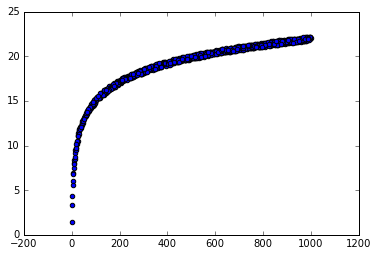

In [29]:
#plot x and y
plt.scatter(x,y)

In [32]:
#call model a log transformation of y


lsm = sm.OLS(np.log(y),x)
fit = lsm.fit()
fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     3824.
Date:                Tue, 07 Feb 2017   Prob (F-statistic):               0.00
Time:                        12:47:05   Log-Likelihood:                -1705.9
No. Observations:                 999   AIC:                             3414.
Df Residuals:                     998   BIC:                             3419.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0045   7.32e-05     61.838      0.000         0.004     0.005
==============================================================================
Omnibus:                     1286.949   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.704
Skew:                          -0.147   Prob(JB):                     7.31e-16
Kurtosis:                       1.740   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

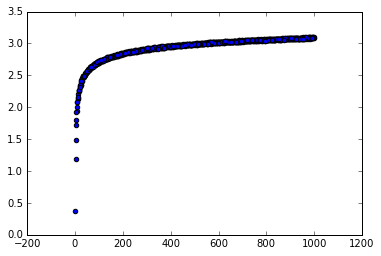

In [33]:
plt.scatter(x,np.log(y))

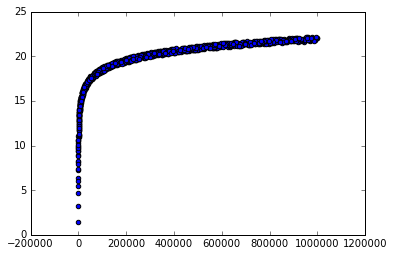

In [19]:
plt.scatter(np.power(x,2),y)

In [20]:
lsm = sm.OLS(y,np.power(x,2))
fit = lsm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1958.
Date:                Tue, 07 Feb 2017   Prob (F-statistic):          1.53e-237
Time:                        11:55:30   Log-Likelihood:                -3828.0
No. Observations:                 999   AIC:                             7658.
Df Residuals:                     998   BIC:                             7663.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            3.5e-05   7.91e-07     44.248      0.000      3.34e-05  3.65e-05
==============================================================================
Omnibus:                      116.230   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.155
Skew:                          -0.849   Prob(JB):                     2.01e-29
Kurtosis:                       2.460   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
df = pd.DataFrame({"Y": y, "x":x,"x_squared":  X_squared})

In [104]:
#possibly wrong

#call model a quadratic transformation of y
"""X_squared = list([i**2 for i in x])

df = pd.DataFrame({"Y": y, "x":x,"x_squared":  X_squared, "epsilon": epsilon})
y = df.Y
x = df.drop(['Y'],1)


lsm = sm.OLS(y,x)
fit = lsm.fit()
fit.summary()"""



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.027e+04
Date:                Mon, 06 Feb 2017   Prob (F-statistic):               0.00
Time:                        16:14:51   Log-Likelihood:                -1476.0
No. Observations:                 999   AIC:                             2958.
Df Residuals:                     996   BIC:                             2973.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
epsilon        3.8131      0.201     18.936      0.000         3.418     4.208
x              0.0186      0.000     61.325      0.000         0.018     0.019
x_squared  -1.389e-05   3.41e-07    -40.773      0.000     -1.46e-05 -1.32e-05
==============================================================================
Omnibus:                       38.120   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.570
Skew:                           0.345   Prob(JB):                     2.30e-07
Kurtosis:                       2.492   Cond. No.                     2.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Challenge 2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [37]:
x = np.array(x)
x2 = random.sample(xrange(1,1000), 999)
x2_squared = np.power(x2, 2)
B2 = 4
B1 = 3
B0 = 1
log_x = np.log(x)
epsilon = np.array([random.uniform(0,0.5) for i in range(999)])
y = (B0 + B1*x + B2*x2_squared + epsilon)

In [40]:
df = pd.DataFrame({"x" : x, "y" : y, "x2_squared" : x2_squared})

In [41]:
df.head()

,x,x2_squared,y
0,222,238144,9.532432e+05
1,898,574564,2.300951e+06
2,373,338724,1.356016e+06
3,327,34969,1.408583e+05
4,91,76176,3.049782e+05


In [45]:
y = df[["y"]]
x = df[["x", "x2_squared"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
reg = LinearRegression()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.99999999999998823

In [59]:
y_est = reg.predict(x_test)
y_est = np.array(y_est)
y_train = np.array(y_train)

mse = metrics.mean_squared_error(y_train, y_est)

challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC

In [77]:
x = np.array(x)
x2 = random.sample(xrange(1,1000), 999)
x2_squared = np.power(x2, 2)
B2 = 4
B1 = 3
B0 = 1
log_x = np.log(x)
epsilon = np.array([random.uniform(0,0.5) for i in range(999)])
y = (B0 + B1*x + B2*x2_squared + epsilon)

In [78]:
x_2 = np.power(x, 2)
x_3 = np.power(x, 3)
x_4 = np.power(x, 4)
x_5 = np.power(x, 5)
x_6 = np.power(x, 6)
x_7 = np.power(x, 7)



In [79]:
df = pd.DataFrame({"y" : y, "x" : x,"x_2":  x2, "x_3": x_3, 
                   "x_4": x_4, "x_5": x_5, "x_6" : x_6, 
                   "x_7" : x_7})

features_list = list(df)

In [80]:
df.head()

,x,x_2,x_3,x_4,x_5,x_6,x_7,y
0,332,380,36594368,12149330176,4033577618432,1339147769319424,444597059414048768,5.785972e+05
1,914,72,763551944,697886476816,637868239809824,583011571186179072,-9223372036854775808,2.347942e+04
2,36,495,46656,1679616,60466176,2176782336,78364164096,9.802092e+05
3,324,861,34012224,11019960576,3570467226624,1156831381426176,374813367582081024,2.966257e+06
4,314,875,30959144,9721171216,3052447761824,958468597212736,300959139524799104,3.063443e+06


[1459339835926.8435, 89109764574.41568, 88162979709.035049, 89337074537.761169, 86746833771.225998, 90663840164.409256, 1410913824557.5076]
[-0.0026803154001115992, 0.93506450023111043, 0.94124822828329535, 0.93346188900716076, 0.93351572664539662, 0.92549324683535761, -0.0064496873127479759]
[1254851377964.9683, 86126244109.511444, 89977877829.107864, 85510327302.343674, 95686098175.634155, 109578200175.60614, 1439563085413.334]


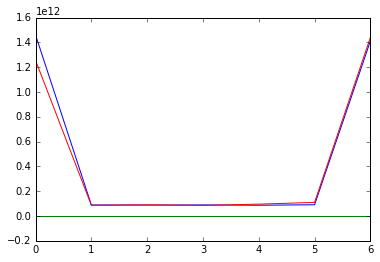

In [91]:
r2_list = []
mse_train_list = []
mse_test_list = []
x_list = []

for i in range(0,7):
    x_list.append(i)
    features = features_list[:i+1]
    
    x = df[features]
    y = df[["y"]]
    
    #train test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    r2 = lr.score(x_test, y_test)
    r2_list.append(r2)
    
    y_est_train = lr.predict(x_train)
    y_est_test = lr.predict(x_test)
    
    mse_train = metrics.mean_squared_error(y_train, y_est_train)
    mse_test = metrics.mean_squared_error(y_test, y_est_test)
    
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    

plt.plot(x_list, mse_train_list)
plt.plot(x_list, r2_list)
plt.plot(x_list, mse_test_list)

print mse_train_list
print r2_list
print mse_test_list

Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [96]:
X_all = df[["x","x_2","x_3","x_4","x_5","x_6","x_7"]]

In [98]:
m = []

for i in range (1,200):
    m.append(i*5)



y= df.y

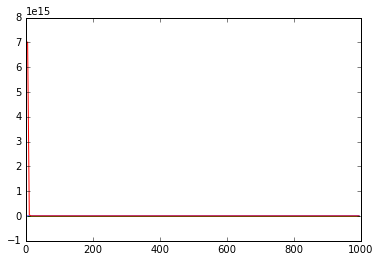

In [101]:
r2_l = []
mse_train_l = []
mse_test_l = []
x_list = []

for i in m:
    x_list.append(i)
    x_data = X_all.iloc[:i]
    y_data = y.iloc[:i]
    
        
    #train test
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    r2 = lr.score(x_test, y_test)
    r2_l.append(r2)
    
    y_est_train = lr.predict(x_train)
    y_est_test = lr.predict(x_test)
    
    mse_train = metrics.mean_squared_error(y_train, y_est_train)
    mse_test = metrics.mean_squared_error(y_test, y_est_test)
    
    mse_train_l.append(mse_train)
    mse_test_l.append(mse_test)
    

plt.plot(x_list, mse_train_l)
plt.plot(x_list, r2_l)
plt.plot(x_list, mse_test_l)
